In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
!pip install tensorflow

In [3]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense

In [4]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [5]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
# 60,000 images with 28*28 pixels
x_train.shape # 60,000 images with 28*28 pixels

(60000, 28, 28)

In [8]:
y_train.shape

(60000,)

In [9]:
x_test.shape

(10000, 28, 28)

In [10]:
y_test.shape

(10000,)

In [11]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [12]:
x_train[0].shape

(28, 28)

5


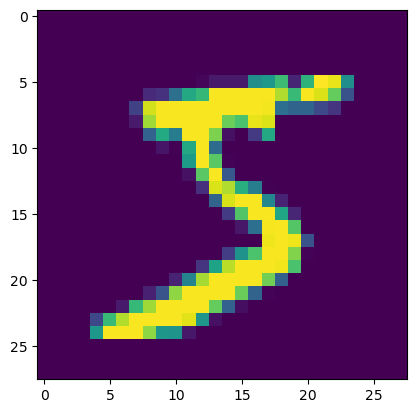

In [13]:
# image of 5 in dataset
plt.imshow(x_train[0])
print(y_train[0])

In [14]:
x_train=x_train/255

In [15]:
x_test=x_test/255

In [16]:
#all values between 0 and 1
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [17]:
model=Sequential()

need to convert 2-d array to 1-d array for input

will convert 28*28 to 784

In [18]:
model.add(Flatten(input_shape=(28,28)))# flatteen the 28*28 input array
model.add(Dense(128,activation="relu"))# 128 neurons with relu activation function
model.add(Dense(10,activation="softmax"))# activation function="softmax" with 10 neurons 
# as 10 digits. I  t is output layer.

C:\Users\smart\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(optimizer="Adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [21]:
history= model.fit(x_train,y_train,batch_size=64,epochs=10,verbose=1,validation_split=0.2)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8513 - loss: 0.5387 - val_accuracy: 0.9536 - val_loss: 0.1716
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9560 - loss: 0.1553 - val_accuracy: 0.9620 - val_loss: 0.1334
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9701 - loss: 0.1044 - val_accuracy: 0.9679 - val_loss: 0.1082
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9771 - loss: 0.0800 - val_accuracy: 0.9707 - val_loss: 0.0991
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9820 - loss: 0.0629 - val_accuracy: 0.9687 - val_loss: 0.0998
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9870 - loss: 0.0492 - val_accuracy: 0.9735 - val_loss: 0.0858
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9886 - loss: 0.0385 - val_accuracy: 0.9736 - val_loss: 0.0876
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9913 - loss: 0.0322 - val_accuracy: 0.

In [22]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9731 - loss: 0.0911


[0.07630489766597748, 0.9768999814987183]

In [23]:
model.predict(x_test) # each value out of 10 values in an array provides it's 
# probability of being that number e.g 1,2 etc.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[2.0792697e-07, 1.6079837e-10, 1.0234603e-06, ..., 9.9986935e-01,
        4.5942998e-06, 2.1391890e-05],
       [7.1026712e-10, 5.8287469e-06, 9.9999237e-01, ..., 6.0780055e-14,
        7.3714304e-08, 2.0774254e-14],
       [2.7247932e-05, 9.9878329e-01, 1.0229367e-04, ..., 1.0873300e-04,
        9.1679941e-04, 3.9183378e-06],
       ...,
       [4.2138566e-13, 3.5678871e-13, 2.8594805e-15, ..., 3.0876726e-09,
        8.0410798e-09, 1.6220264e-07],
       [3.9143716e-11, 9.5274185e-14, 1.9670269e-15, ..., 2.0285657e-11,
        1.8971687e-06, 7.2694026e-13],
       [9.7921032e-11, 1.1904948e-13, 2.0900770e-09, ..., 6.5040230e-16,
        1.8079518e-13, 3.0326075e-11]], dtype=float32)

In [24]:
# model.predict(x_test[0]) #cannot use as it expects same structure as in learning.(batch_size, features)
model.predict(x_test[:1]) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


array([[2.0792638e-07, 1.6079776e-10, 1.0234594e-06, 1.0343924e-04,
        2.1567715e-12, 8.7617580e-10, 9.6788148e-13, 9.9986935e-01,
        4.5942952e-06, 2.1391850e-05]], dtype=float32)

In [26]:
import numpy as np

# Get predicted probabilities
y_pred_prob = model.predict(x_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=-1)

print(y_pred) 

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[7 2 1 ... 4 5 6]
